In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from bertopic import BERTopic


In [3]:
df = pd.read_excel('GS1.xlsx')
df.sample(3)

,Year,Question,Subject,Sub-Topic
149,2016,Why are the tribals in India referred to as 't...,Indian Society,Poverty and Developmental issues
49,2021,Examine the role of ‘Gig Economy’ in the proce...,Indian Society,Role of women and women’s organization
155,2016,South China Sea has assumed great geopolitical...,Geography,World’s Physical Geography


In [4]:
questions = df['Question'].values.tolist()

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    # Tokenize the sentence and find the POS tag for each token
    nltk_tagged = pos_tag(word_tokenize(sentence))  
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # If there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            # Else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


In [8]:
import re
import string

def preprocess_text(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))

    # Add question words to the set of stopwords
    question_words = {'explain', 'what', 'when', 'where', 'who', 'whom', 'which', 'why', 'how', 
                        'comment', 'discuss','following', 'example', 
                        'examine', 'state', 'critically','context', 'measures', 
                        'suggest', 'evaluate', 'describe', 'identify', 'illustrate','can','could','should',
                        'do','does','would','did','will','might'}
    stop_words.update(question_words)
    stop_words = list(stop_words)   
    
    

    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove extra spaces
    text = re.sub(r' +', ' ', text)

    # Tokenize the text to filter out stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)

    tokens = lemmatize_sentence(text)
    return tokens
    
    

text = df.Question[0]
print(text)
filtered_text = preprocess_text(text)
print(filtered_text)

Explain the role of geographical factors towards the development of Ancient India.
role geographical factor towards development ancient india


In [9]:
lemmatized_questions = [preprocess_text(question) for question in questions]

In [10]:
print(len(lemmatized_questions))

235


In [11]:
stop_words = set(stopwords.words('english'))

    # Add question words to the set of stopwords
question_words = {'explain', 'what', 'when', 'where', 'who', 'whom', 'which', 'why', 'how', 
                        'comment', 'discuss','following', 'example', 
                        'examine', 'state', 'critically','context', 'measures', 
                        'suggest', 'evaluate', 'describe', 'identify', 'illustrate','can','could','should',
                        'do','does','would','did','will','might'}
stop_words.update(question_words)
stop_words = list(stop_words)   
    

In [38]:
# from sentence_transformers import SentenceTransformer
# from sklearn.model_selection import ParameterGrid

# param_grid = {
#     'n_gram_range': [(1, 2), (1, 3)],
#     'questions': [lemmatized_questions],
#     'embedding_model': ['paraphrase-MiniLM-L6-v2','all-mpnet-base-v2','xlm-r-bert-base-nli-stsb-mean-tokens','distilbert-multilingual-nli-stsb-quora-ranking']
    
# }

# best_params = None
# best_outliers = float('inf')
# outliers_list = []

# from bertopic.representation import KeyBERTInspired
# from bertopic.representation import MaximalMarginalRelevance
# from bertopic.representation import PartOfSpeech

# representation = [PartOfSpeech("en_core_web_sm"),MaximalMarginalRelevance(diversity=0.2),KeyBERTInspired(top_n_words=30)]


# from sklearn.feature_extraction.text import CountVectorizer

# from bertopic.vectorizers import ClassTfidfTransformer
# iteration = 1
# for params in ParameterGrid(param_grid):
#     print(iteration)
#     iteration += 1
#     sentence_model = SentenceTransformer(params['embedding_model'])
#     ctfidf_model = ClassTfidfTransformer(bm25_weighting=True,reduce_frequent_words=True)
#     vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=params['n_gram_range'])
#     model = BERTopic(embedding_model=sentence_model,vectorizer_model=vectorizer_model,representation_model=representation,ctfidf_model=ctfidf_model,calculate_probabilities=True, nr_topics='6-10', min_topic_size=10,)
#     topics, probs = model.fit_transform(params['questions'])
    
#     unique_topics = len(set(topics)) - (1 if -1 in topics else 0)
#     if unique_topics < 4:
#         continue  # Skip this iteration if the number of topics is not greater than 4
      
#     outlier_count = sum(1 for topic in topics if topic == -1)
#     outliers_list.append(outlier_count)
#     print(f"Outliers: {outlier_count} , Parameters: {params}")
    
#     if outlier_count < best_outliers:
#         best_params = params
#         best_outliers = outlier_count
#         model.save("best_model")
#         print(f"Best parameters: {best_params}, Best outliers: {best_outliers}")
#         if best_outliers < 20:
#             model.get_topic_info()
#             break
        
    
    
    



1
2
3


2024-07-19 06:29:16,350 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


Outliers: 56 , Parameters: {'embedding_model': 'all-mpnet-base-v2', 'n_gram_range': (1, 2), 'questions': ['role geographical factor towards development ancient india', 'difference mahatma gandhi rabindranath tagore approach towards education nationalism', 'bring socioeconomic effect introduction railway different country world', 'consequence climate change food security tropical country', 'world today confront crisis availability access freshwater resource', 'fjord form constitute picturesque area world', 'southwest monsoon call purvaiya easterly bhojpur region directional seasonal wind system influenced cultural ethos region', 'think marriage sacrament loose value modern india', 'suicide among young woman increase indian society', 'child cuddle replace mobile phone impact socialization child', 'main feature vedic society religion think feature still prevail indian society', 'major technological change introduce sultanate period technological change influence indian society', 'colonial

2024-07-19 06:30:01,289 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


Outliers: 39 , Parameters: {'embedding_model': 'all-mpnet-base-v2', 'n_gram_range': (1, 3), 'questions': ['role geographical factor towards development ancient india', 'difference mahatma gandhi rabindranath tagore approach towards education nationalism', 'bring socioeconomic effect introduction railway different country world', 'consequence climate change food security tropical country', 'world today confront crisis availability access freshwater resource', 'fjord form constitute picturesque area world', 'southwest monsoon call purvaiya easterly bhojpur region directional seasonal wind system influenced cultural ethos region', 'think marriage sacrament loose value modern india', 'suicide among young woman increase indian society', 'child cuddle replace mobile phone impact socialization child', 'main feature vedic society religion think feature still prevail indian society', 'major technological change introduce sultanate period technological change influence indian society', 'colonial

In [12]:
model = BERTopic.load("best_model")

In [13]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,39,-1_natural vegetation india_development india_...,"[natural vegetation india, development india, ...",[petroleum refinery necessarily locate near cr...
1,0,62,0_water resource india_monsoon_climate_affect ...,"[water resource india, monsoon, climate, affec...",[southwest monsoon call purvaiya easterly bhoj...
2,1,52,1_indian independence_modern india_british ind...,"[indian independence, modern india, british in...",[woman question arise modern india part 19th c...
3,2,34,2_city india_india grow_delhi_energy india,"[city india, india grow, delhi, energy india, ...",[mumbai delhi kolkata three mega city country ...
4,3,32,3_indian society_caste system_prevail indian s...,"[indian society, caste system, prevail indian ...",[ancient civilization indian sub continent dif...
5,4,16,4_monument art india_indian art_indian temple ...,"[monument art india, indian art, indian temple...",[early buddhist stupaart depict folk motif nar...


In [13]:

model.get_representative_docs()

{-1: ['petroleum refinery necessarily locate near crude oil produce area particularly many develop country implication',
  'whereas british planter develop tea garden along shivaliks less himalaya assam himachal pradesh effect succeed beyond darjeeling area',
  'say india substantial reserve shale oil gas feed need country quarter century however tap resource appear high agenda availability issue involve'],
 0: ['southwest monsoon call purvaiya easterly bhojpur region directional seasonal wind system influenced cultural ethos region',
  'ideal solution deplete ground water resource india water harvesting system make effective urban area',
  'world fold mountain system locate along margin continent bring association global distribution fold mountains earthquake volcano'],
 1: ['woman question arise modern india part 19th century social reform movement major issue debate concern woman period',
  'army british east india company mostly comprise indian soldier win consistently numerous wel

In [14]:
num_words = 10
topics_ = []
for topic_num in range(len(model.get_topics())):
    # if topic_num != -1:   #-1 is the outlier class in BERTopic
    topic = model.get_topic(topic_num-1)
    if topic:  # Check if topic is not None
        top_words = [word for word, _ in topic[:num_words]]
        top_words = " ".join(top_words)
        topics_.append(f"Topic {topic_num}: {top_words}")

len(model.get_topics())

6

In [15]:
topics_

['Topic 0: natural vegetation india development india oil produce area india oil produce poverty government india oil world poverty india natural vegetation poverty india agree',
 'Topic 1: water resource india monsoon climate affect weather resource india water resource city india himalayan glacier himalayan navigation india',
 'Topic 2: indian independence modern india british india prosperous region india woman india gandhian phase gandhi india indian 1857',
 'Topic 3: city india india grow delhi energy india promote employment india urbanization india place economic steel industry iron steel industry',
 'Topic 4: indian society caste system prevail indian society diversity india promote cultural homogenisation caste culture promote cultural cultural region religion',
 'Topic 5: monument art india indian art indian temple sculpture period indian heritage modern painting gandhara painting gandhara sculpture painting gandhara inscription chola architecture monument art medieval india 

In [16]:
topic_names = {0:'Outliers',1:'Climate Change and Natural Resources',2:'British India and Independence',3:'Development and Urbanisation',4:'Indian Society',5:'Art and Heritage'}
num_words = 10
topics_ = {}
for topic_num in range(len(model.get_topics())):
    # if topic_num != -1:   #-1 is the outlier class in BERTopic
    topic = model.get_topic(topic_num-1)
    if topic:  # Check if topic is not None
        top_words = [word for word, _ in topic[:num_words]]
        topics_[topic_names[topic_num]] = top_words

In [17]:
topics_

{'Outliers': ['natural vegetation india',
  'development india',
  'oil produce area',
  'india',
  'oil produce',
  'poverty government india',
  'oil world',
  'poverty india',
  'natural vegetation',
  'poverty india agree'],
 'Climate Change and Natural Resources': ['water resource india',
  'monsoon',
  'climate',
  'affect weather',
  'resource india',
  'water resource',
  'city india',
  'himalayan glacier',
  'himalayan',
  'navigation india'],
 'British India and Independence': ['indian independence',
  'modern india',
  'british india',
  'prosperous region india',
  'woman india',
  'gandhian phase',
  'gandhi',
  'india',
  'indian',
  '1857'],
 'Development and Urbanisation': ['city india',
  'india grow',
  'delhi',
  'energy india',
  'promote employment india',
  'urbanization',
  'india',
  'place economic',
  'steel industry',
  'iron steel industry'],
 'Indian Society': ['indian society',
  'caste system',
  'prevail indian society',
  'diversity india',
  'promote 

In [18]:
from sentence_transformers import CrossEncoder
import numpy as np

In [19]:
from sentence_transformers import SentenceTransformer

In [20]:
sbert_model = SentenceTransformer('all-mpnet-base-v2')
question_embeddings = sbert_model.encode(lemmatized_questions)

topic_embeddings = {}
for i in range(len(topics_.items())):
    topic_embeddings[topic_names[i]] = []
    for word in topics_[topic_names[i]]:
        topic_embeddings[topic_names[i]].append(sbert_model.encode(word))
        
topic_embeddings

{'Outliers': [array([ 2.48217806e-02,  5.82886413e-02, -3.39468420e-02,  1.57872532e-02,
         -8.40494409e-03, -1.09411748e-02, -7.35478848e-02,  5.84591879e-03,
         -1.49670606e-02,  1.80987678e-02,  1.32590011e-02,  4.09217440e-02,
          6.74093002e-03, -7.42441858e-04, -7.12013803e-03, -5.38006760e-02,
         -1.69829112e-02, -2.30057705e-02, -1.21288784e-02,  9.72289592e-03,
         -2.05114800e-02, -7.49164773e-03, -2.94169113e-02, -1.47988014e-02,
         -1.38264699e-02, -2.68820382e-04, -4.34718328e-03,  1.76295433e-02,
          4.12902646e-02, -6.65583462e-02, -3.94427106e-02, -4.18906286e-02,
         -5.45472139e-03, -7.43986815e-02,  8.47755643e-07, -2.89133936e-02,
         -7.18076155e-03,  4.09922283e-03,  3.44490856e-02, -2.26903092e-02,
          5.47227124e-03,  6.87246099e-02,  2.37014033e-02, -2.84588672e-02,
          4.42489283e-03, -1.79128647e-02,  3.58896740e-02, -8.61502835e-04,
         -3.64020541e-02,  4.05838490e-02, -6.93523185e-03, -2.3

In [21]:
len(topic_embeddings['Outliers'][0])

768

In [22]:
all_embeddings = []
word_to_topic = {}
for topic,embeddings in topic_embeddings.items():
    for embedding in embeddings:
        all_embeddings.append(embedding)
        word_to_topic[tuple(embedding)] = topic
        
all_embeddings = np.array(all_embeddings)


In [23]:
len(question_embeddings[0])


768

In [24]:
print(np.linalg.norm(question_embeddings[100] - topic_embeddings['Outliers'][1]))

1.1068882


In [25]:
questions[4]

'Why is the world today confronted with a crisis of availability of and access to freshwater resources?'

In [26]:
from sentence_transformers import CrossEncoder
crossencoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')


In [27]:
questions[77]

'Is diversity and pluralism in India under threat due to globalisation? Justify your answer.'

In [28]:
question = questions[77]
topics_nearest = []
for i in range(len(topics_.items())):
    for word in topics_[topic_names[i]]:
        score = crossencoder.predict([(question,word)])
        topics_nearest.append({topic_names[i]: [score.tolist()[0],word]})

topics_nearest


[{'Outliers': [-8.018174171447754, 'natural vegetation india']},
 {'Outliers': [-6.8530473709106445, 'development india']},
 {'Outliers': [-10.1339111328125, 'oil produce area']},
 {'Outliers': [-4.742265701293945, 'india']},
 {'Outliers': [-9.860478401184082, 'oil produce']},
 {'Outliers': [-7.582091331481934, 'poverty government india']},
 {'Outliers': [-9.221839904785156, 'oil world']},
 {'Outliers': [-7.104440212249756, 'poverty india']},
 {'Outliers': [-9.680912017822266, 'natural vegetation']},
 {'Outliers': [-7.202902793884277, 'poverty india agree']},
 {'Climate Change and Natural Resources': [-8.16573429107666,
   'water resource india']},
 {'Climate Change and Natural Resources': [-9.420406341552734, 'monsoon']},
 {'Climate Change and Natural Resources': [-9.265151977539062, 'climate']},
 {'Climate Change and Natural Resources': [-10.19410228729248,
   'affect weather']},
 {'Climate Change and Natural Resources': [-6.827172756195068,
   'resource india']},
 {'Climate Change a

In [29]:
topics_nearest.sort(key=lambda x: list(x.values())[0],reverse=True)
top_7_nearest = topics_nearest[:7]
top_7_nearest

[{'Indian Society': [0.06132066249847412, 'diversity india']},
 {'Outliers': [-4.742265701293945, 'india']},
 {'British India and Independence': [-4.742265701293945, 'india']},
 {'Development and Urbanisation': [-4.742265701293945, 'india']},
 {'British India and Independence': [-5.261474132537842, 'modern india']},
 {'Indian Society': [-5.402409553527832, 'indian society']},
 {'British India and Independence': [-5.474110126495361, 'indian']}]

In [30]:

highest_scores = {}

for entry in topics_nearest:
    for topic, (score, word) in entry.items():
        if topic not in highest_scores or score > highest_scores[topic][0]:
            highest_scores[topic] = (score, word)

total = sum(score for score,word in highest_scores.values())



closest_topics = {topic:(score/total , word) for topic,(score,word) in highest_scores.items()}


closest_topics

{'Indian Society': (-0.002136868798847934, 'diversity india'),
 'Outliers': (0.16525587298072503, 'india'),
 'British India and Independence': (0.16525587298072503, 'india'),
 'Development and Urbanisation': (0.16525587298072503, 'india'),
 'Climate Change and Natural Resources': (0.23790956999887136,
  'resource india'),
 'Art and Heritage': (0.26845967985780145, 'indian art')}

In [31]:
def score_generate(question):
    topics_nearest = []
    for i in range(len(topics_.items())):
        for word in topics_[topic_names[i]]:
            score = crossencoder.predict([(question,word)])
            topics_nearest.append({topic_names[i]: [score.tolist()[0],word]})
    
    highest_scores = {}
    for entry in topics_nearest:
        for topic, (score, word) in entry.items():
            if topic not in highest_scores or score > highest_scores[topic][0]:
                highest_scores[topic] = (score, word)

    total = sum(score for score,word in highest_scores.values())
    closest_topics = {topic:(score/total) for topic,(score,word) in highest_scores.items()}
    return closest_topics

In [32]:
data = pd.DataFrame()

for i in range(len(questions)):
    data_ = pd.DataFrame(score_generate(questions[i]),index=[i])
    data_['Question'] = questions[i]
    
    data = pd.concat([data,data_],ignore_index=True)

data

,Outliers,Climate Change and Natural Resources,British India and Independence,Development and Urbanisation,Indian Society,Art and Heritage,Question
0,0.098250,0.198250,0.161511,0.161511,0.198600,0.181877,Explain the role of geographical factors towar...
1,0.178551,0.189483,0.087331,0.178551,0.169535,0.196548,What was the difference between Mahatma Gandhi...
2,0.141042,0.187913,0.141042,0.141042,0.172094,0.216866,Bring out the socio-economic effects of the in...
3,0.169515,0.133423,0.162809,0.169515,0.176277,0.188461,Discuss the consequences of climate change on ...
4,0.174934,0.090054,0.158585,0.176501,0.185083,0.214843,Why is the world today confronted with a crisi...
...,...,...,...,...,...,...,...
230,0.161976,0.171058,0.154741,0.161976,0.174145,0.176105,There is no formation of deltas by rivers on t...
231,0.135461,0.180043,0.140235,0.140235,0.189869,0.214157,Do you agree that there is a growing trend of ...
232,0.129092,0.181036,0.129092,0.129092,0.198517,0.233171,Analyze the factors for the highly decentraliz...
233,0.149606,0.202763,0.149606,0.075608,0.205655,0.216763,"With growing scarcity of fossil fuels, the ato..."


In [33]:
data['Topic'] = data.iloc[:, :-1].idxmin(axis=1)
data

,Outliers,Climate Change and Natural Resources,British India and Independence,Development and Urbanisation,Indian Society,Art and Heritage,Question,Topic
0,0.098250,0.198250,0.161511,0.161511,0.198600,0.181877,Explain the role of geographical factors towar...,Outliers
1,0.178551,0.189483,0.087331,0.178551,0.169535,0.196548,What was the difference between Mahatma Gandhi...,British India and Independence
2,0.141042,0.187913,0.141042,0.141042,0.172094,0.216866,Bring out the socio-economic effects of the in...,Outliers
3,0.169515,0.133423,0.162809,0.169515,0.176277,0.188461,Discuss the consequences of climate change on ...,Climate Change and Natural Resources
4,0.174934,0.090054,0.158585,0.176501,0.185083,0.214843,Why is the world today confronted with a crisi...,Climate Change and Natural Resources
...,...,...,...,...,...,...,...,...
230,0.161976,0.171058,0.154741,0.161976,0.174145,0.176105,There is no formation of deltas by rivers on t...,British India and Independence
231,0.135461,0.180043,0.140235,0.140235,0.189869,0.214157,Do you agree that there is a growing trend of ...,Outliers
232,0.129092,0.181036,0.129092,0.129092,0.198517,0.233171,Analyze the factors for the highly decentraliz...,Outliers
233,0.149606,0.202763,0.149606,0.075608,0.205655,0.216763,"With growing scarcity of fossil fuels, the ato...",Development and Urbanisation


In [36]:
data['Year'] = df['Year']
data.sample(5)

,Outliers,Climate Change and Natural Resources,British India and Independence,Development and Urbanisation,Indian Society,Art and Heritage,Question,Topic,Year
15,0.101880,0.210618,0.136603,0.136603,0.183022,0.231274,Why did human development fail to keep pace wi...,Outliers,2023
20,0.204979,0.241467,0.173363,0.204979,0.149852,0.025359,How will you explain the medieval Indian templ...,Art and Heritage,2022
61,0.161839,0.191202,0.138735,0.161839,0.205610,0.140775,Pala period is the most significant phase in t...,British India and Independence,2020
129,0.174051,0.186960,0.114753,0.174051,0.158711,0.191473,What are the two major legal initiatives by th...,British India and Independence,2017
29,0.148864,0.198302,0.148864,0.148864,0.159040,0.196068,Given the diversities among the tribal communi...,Outliers,2022


In [38]:
data.to_excel('GS1_topics_v3.xlsx', index=False)

In [20]:
data = pd.read_excel('GS1_topics_v3.xlsx')

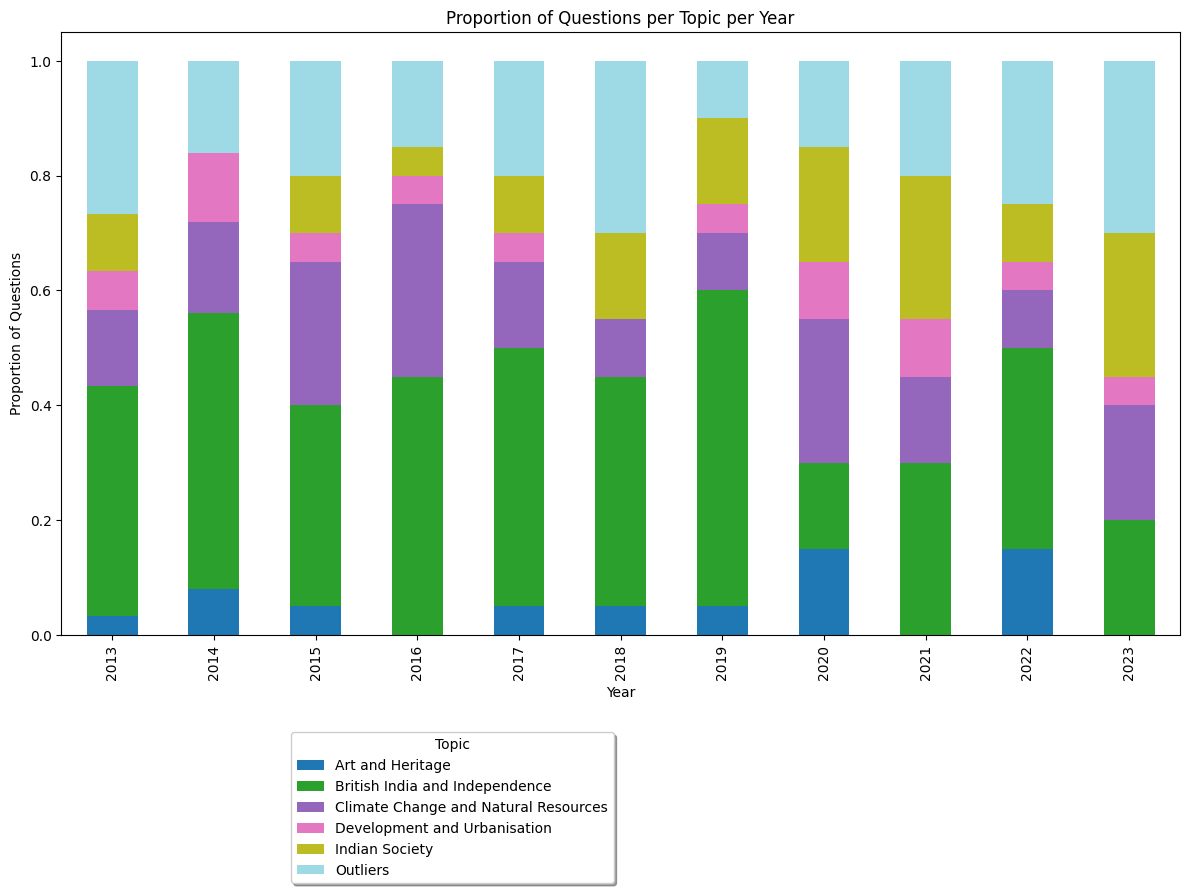

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Step 2: Count questions per topic per year
topic_year_counts = data.groupby(['Year', 'Topic']).size().reset_index(name='Count')

# Calculate the total number of questions per year
total_questions_per_year = topic_year_counts.groupby('Year')['Count'].transform('sum')

# Calculate the proportion of questions per topic per year
topic_year_counts['Proportion'] = topic_year_counts['Count'] / total_questions_per_year

# Step 3: Prepare data for plotting (normalized)
pivot_table = topic_year_counts.pivot(index='Year', columns='Topic', values='Proportion')

# Generate a list of colors from a colormap
num_topics = len(pivot_table.columns)
colors = plt.get_cmap('tab20', num_topics)

# Step 4: Plot the normalized data with different colors for each topic
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors(i) for i in range(num_topics)])

# Step 5: Customize the plot
plt.xlabel('Year')
plt.ylabel('Proportion of Questions')
plt.title('Proportion of Questions per Topic per Year')
plt.legend(title='Topic', loc='best', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

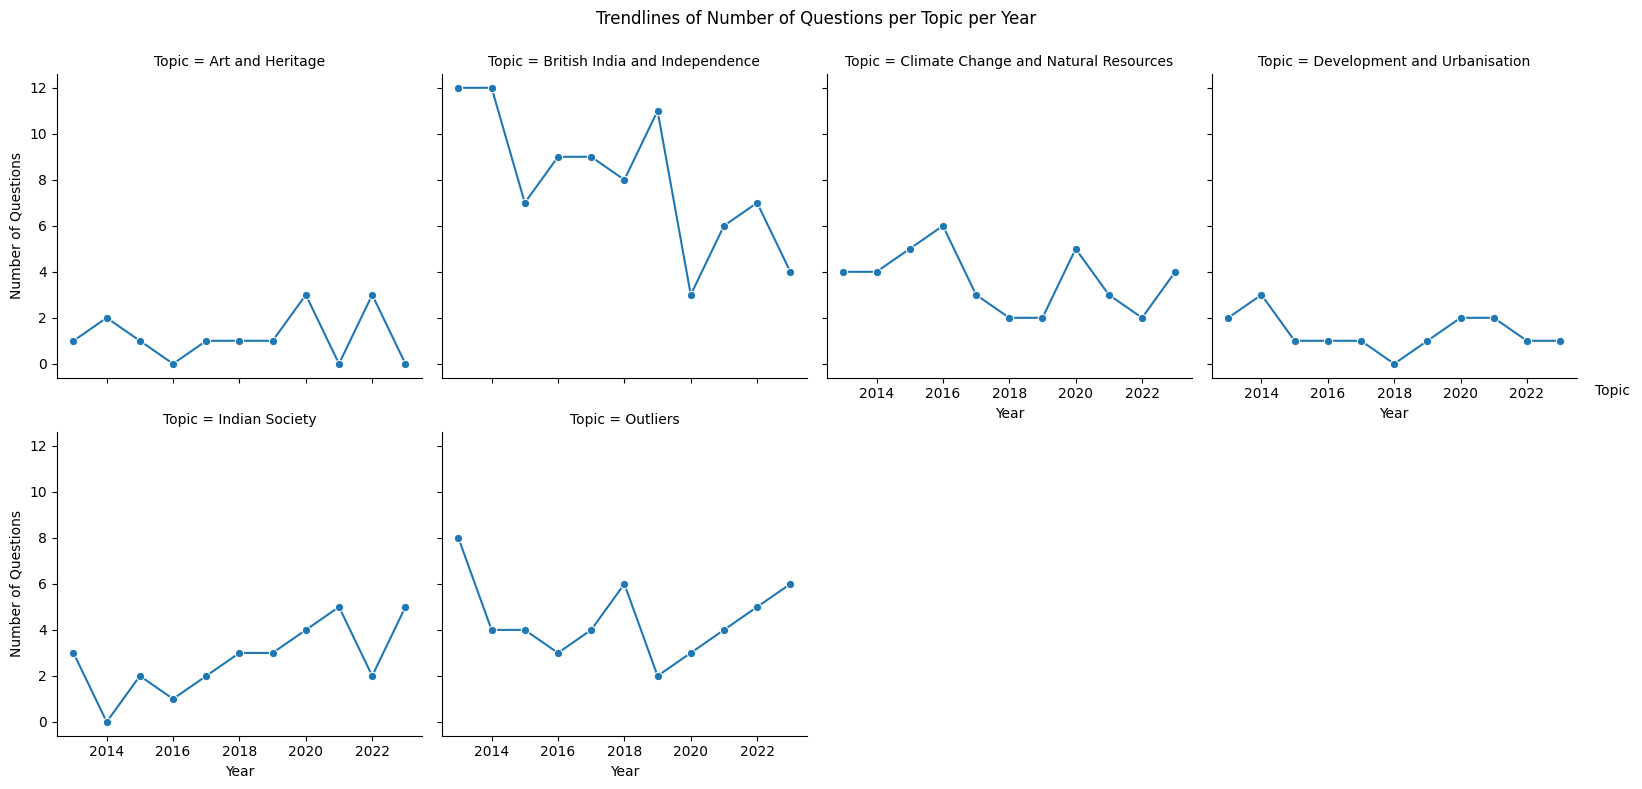

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

topic_year_counts = pd.crosstab(data['Year'], data['Topic'])

# Reset index to convert the pivot table to a DataFrame
topic_year_counts = topic_year_counts.reset_index()

# Melt the DataFrame to long format for Seaborn
melted_topic_year_counts = topic_year_counts.melt(id_vars='Year', var_name='Topic', value_name='Count')


g = sns.FacetGrid(melted_topic_year_counts, col='Topic', col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.lineplot, 'Year', 'Count', marker='o')
g.set_axis_labels('Year', 'Number of Questions')
g.add_legend(title='Topic')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trendlines of Number of Questions per Topic per Year')
plt.show()


In [59]:
question = question_embeddings[4]
topics_nearest = []
for embedding in all_embeddings:
    
    norm = np.linalg.norm(question - embedding)
    topics_nearest.append({word_to_topic[tuple(embedding)]: norm})

[{'Outliers': 1.274257},
 {'Outliers': 1.1730444},
 {'Outliers': 1.2659703},
 {'Development and Urbanisation': 1.2522027},
 {'Outliers': 1.2586452},
 {'Outliers': 1.1819347},
 {'Outliers': 1.0933999},
 {'Outliers': 1.1490877},
 {'Outliers': 1.3070139},
 {'Outliers': 1.1615788},
 {'Climate Change and Natural Resources': 0.8815399},
 {'Climate Change and Natural Resources': 1.2323157},
 {'Climate Change and Natural Resources': 1.1684386},
 {'Climate Change and Natural Resources': 1.295688},
 {'Climate Change and Natural Resources': 1.0634365},
 {'Climate Change and Natural Resources': 0.8409038},
 {'Development and Urbanisation': 1.2772114},
 {'Climate Change and Natural Resources': 1.2361544},
 {'Climate Change and Natural Resources': 1.2805737},
 {'Climate Change and Natural Resources': 1.2204977},
 {'British India and Independence': 1.3301831},
 {'British India and Independence': 1.2470764},
 {'British India and Independence': 1.3350704},
 {'British India and Independence': 1.2345706}

In [60]:
topics_nearest.sort(key=lambda x: list(x.values())[0],reverse=True)
top_7_nearest = topics_nearest[:7]
top_7_nearest

[{'Art and Heritage': 1.453472},
 {'Art and Heritage': 1.4090413},
 {'British India and Independence': 1.3965896},
 {'Art and Heritage': 1.3919938},
 {'Art and Heritage': 1.3731402},
 {'Art and Heritage': 1.3650644},
 {'Art and Heritage': 1.3619974}]

In [88]:
topic_embeddings = sbert_model.encode(topics_)

pairs = [[question, topic] for question in lemmatized_questions for topic in topics_]
pair_scores = cross_encoder.predict(pairs)

similarity_matrix = np.array(pair_scores).reshape(len(lemmatized_questions), len(topics_))

most_similar_topics = np.argmax(similarity_matrix, axis=1)

for i, question in enumerate(questions):
    print(f"Question: {question}")
    print(f"Most Similar Topic: {topics_[most_similar_topics[i]].split(':')[0]}")

Question: Explain the role of geographical factors towards the development of Ancient India.
Most Similar Topic:  Development and Urbanisation
Question: What was the difference between Mahatma Gandhi and Rabindranath Tagore in their approach towards education and nationalism?
Most Similar Topic:  British India and Independence
Question: Bring out the socio-economic effects of the introduction of railways in different countries of the world
Most Similar Topic:  Development and Urbanisation
Question: Discuss the consequences of climate change on the food security in tropical countries.
Most Similar Topic:  Climate Change and Natural Resources
Question: Why is the world today confronted with a crisis of availability of and access to freshwater resources?
Most Similar Topic:  Climate Change and Natural Resources
Question: How are the fjords formed? Why do they constitute some of the most picturesque areas of the world?
Most Similar Topic:  Outliers
Question: Why is the South-West monsoon c

In [89]:
data = pd.DataFrame({'Question': questions, 'Topic': [topics_[most_similar_topics[i]].split(':')[0] for i in range(len(questions))]})

In [90]:
data.to_excel('GS1_topics_v3.xlsx', index=False)

In [91]:
data.sample(5)

,Question,Topic
214,Analyze the circumstances that led to the Tash...,Outliers
37,Analyze the salience of ‘sect’ in Indian socie...,Indian Society
153,"""The Himalayas are highly prone to landslides....",Art and Heritage
59,How does Indian society maintain continuity in...,Indian Society
83,Assess the impact of global warming on the cor...,Art and Heritage


In [92]:
data.Topic.value_counts()

Topic
Indian Society                          52
British India and Independence          49
Climate Change and Natural Resources    47
Development and Urbanisation            37
Art and Heritage                        34
Outliers                                16
Name: count, dtype: int64

In [93]:
data.Topic.value_counts(normalize=True)

Topic
Indian Society                          0.221277
British India and Independence          0.208511
Climate Change and Natural Resources    0.200000
Development and Urbanisation            0.157447
Art and Heritage                        0.144681
Outliers                                0.068085
Name: proportion, dtype: float64

<Axes: title={'center': 'Topic Frequency'}, xlabel='Topics', ylabel='Number Of Questions'>

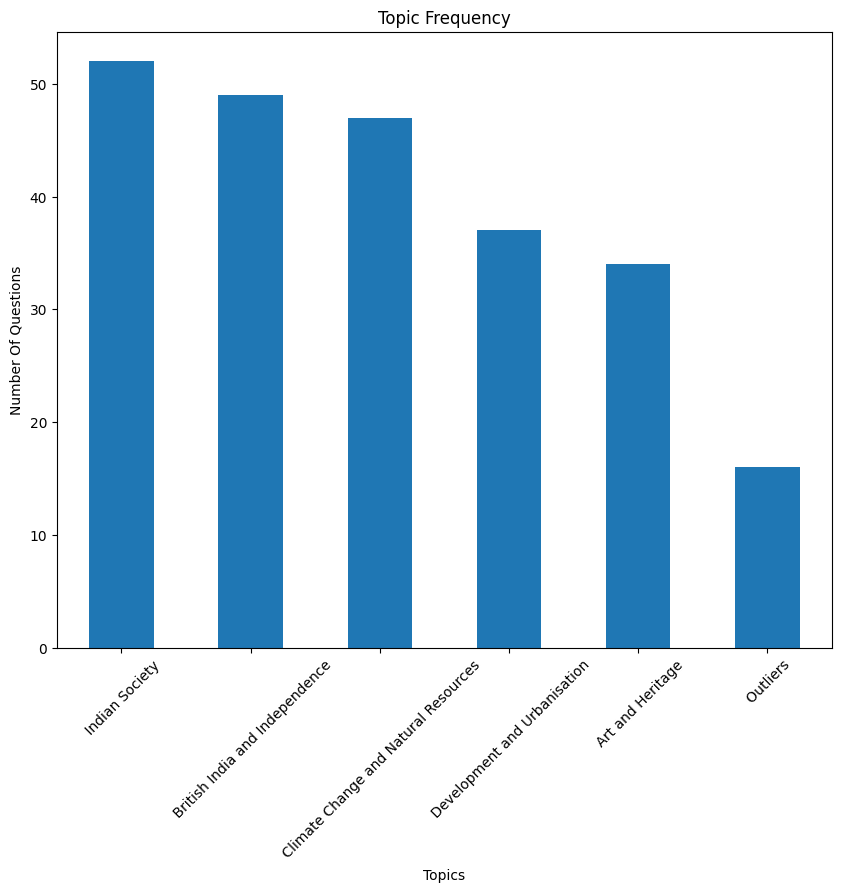

In [94]:
data.Topic.value_counts().plot(kind='bar', figsize=(10, 8), title='Topic Frequency', xlabel='Topics', ylabel='Number Of Questions', rot=45)

In [121]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('all-mpnet-base-v2')


from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import PartOfSpeech
representation = [PartOfSpeech("en_core_web_sm"),MaximalMarginalRelevance(diversity=0.57),KeyBERTInspired(top_n_words=30)]


from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))

from bertopic.vectorizers import ClassTfidfTransformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True,reduce_frequent_words=True)

model = BERTopic(embedding_model=sentence_model,vectorizer_model=vectorizer_model,representation_model=representation,ctfidf_model=ctfidf_model,verbose=True,calculate_probabilities=True, nr_topics=8, min_topic_size=10)



In [122]:
model.fit_transform(questions)

2024-07-19 09:46:15,939 - BERTopic - Embedding - Transforming documents to embeddings.


Batches: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
2024-07-19 09:46:25,171 - BERTopic - Embedding - Completed ✓
2024-07-19 09:46:25,183 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-19 09:46:29,925 - BERTopic - Dimensionality - Completed ✓
2024-07-19 09:46:29,927 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-19 09:46:29,962 - BERTopic - Cluster - Completed ✓
2024-07-19 09:46:29,963 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-19 09:46:38,653 - BERTopic - Representation - Completed ✓
2024-07-19 09:46:38,654 - BERTopic - Topic reduction - Reducing number of topics
2024-07-19 09:46:38,654 - BERTopic - Topic reduction - Reduced number of topics from 7 to 7


([-1,
  3,
  4,
  1,
  1,
  1,
  1,
  2,
  5,
  5,
  2,
  -1,
  3,
  1,
  -1,
  4,
  -1,
  4,
  2,
  2,
  0,
  3,
  -1,
  1,
  1,
  -1,
  -1,
  5,
  4,
  2,
  -1,
  0,
  0,
  1,
  -1,
  1,
  1,
  2,
  2,
  -1,
  -1,
  2,
  -1,
  1,
  -1,
  1,
  1,
  -1,
  2,
  4,
  3,
  3,
  3,
  1,
  1,
  -1,
  4,
  -1,
  -1,
  2,
  0,
  0,
  3,
  1,
  1,
  1,
  -1,
  2,
  -1,
  2,
  0,
  0,
  3,
  1,
  1,
  -1,
  -1,
  2,
  2,
  4,
  0,
  3,
  3,
  1,
  1,
  4,
  -1,
  2,
  5,
  2,
  3,
  3,
  3,
  1,
  1,
  4,
  1,
  2,
  5,
  2,
  0,
  0,
  3,
  1,
  1,
  1,
  1,
  -1,
  4,
  2,
  -1,
  -1,
  3,
  1,
  -1,
  4,
  4,
  5,
  2,
  -1,
  0,
  3,
  3,
  3,
  1,
  -1,
  -1,
  1,
  2,
  -1,
  2,
  -1,
  3,
  1,
  -1,
  1,
  1,
  -1,
  2,
  4,
  0,
  -1,
  3,
  -1,
  3,
  -1,
  3,
  2,
  5,
  -1,
  4,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  0,
  3,
  3,
  3,
  -1,
  3,
  2,
  5,
  5,
  -1,
  5,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  4,
  1,
  -1,
  0,
  -1,
  3,
  -1,
  3,
  3,
  3,
  3,
  3,
  5

In [123]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,60,-1_india growing_energy india_colonial india_p...,"[india growing, energy india, colonial india, ...","[With growing scarcity of fossil fuels, the at..."
1,0,16,0_monuments art india_indian temple sculptures...,"[monuments art india, indian temple sculptures...","[Early Buddhist Stupa-art, while depicting fol..."
2,1,60,1_water resources india_floods_ocean currents_...,"[water resources india, floods, ocean currents...",[“The ideal solution of depleting ground water...
3,2,28,2_prevailing indian society_indian society_reg...,"[prevailing indian society, indian society, re...",[Globalisation is generally said to promote cu...
4,3,40,3_indian independence_independent india_indepe...,"[indian independence, independent india, indep...",[The 1857 uprising was the culmination of the ...
5,4,16,4_india urbanization_process urbanization indi...,"[india urbanization, process urbanization indi...",[With a brief background of quality of urban l...
6,5,15,5_poverty liberate poor_population cause pover...,"[poverty liberate poor, population cause pover...",[“Male membership needs to be encouraged in or...


In [133]:
model.reduce_outliers(questions,model.get_topics())

100%|██████████| 1/1 [00:00<00:00, 166.57it/s]


[4, 0, 1, 2, 3, 4, 5]

In [134]:
model.reduce_outliers(questions,model.get_topics())

100%|██████████| 1/1 [00:00<00:00, 499.86it/s]


[4, 0, 1, 2, 3, 4, 5]

In [135]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,60,-1_india growing_energy india_colonial india_p...,"[india growing, energy india, colonial india, ...","[With growing scarcity of fossil fuels, the at..."
1,0,16,0_monuments art india_indian temple sculptures...,"[monuments art india, indian temple sculptures...","[Early Buddhist Stupa-art, while depicting fol..."
2,1,60,1_water resources india_floods_ocean currents_...,"[water resources india, floods, ocean currents...",[“The ideal solution of depleting ground water...
3,2,28,2_prevailing indian society_indian society_reg...,"[prevailing indian society, indian society, re...",[Globalisation is generally said to promote cu...
4,3,40,3_indian independence_independent india_indepe...,"[indian independence, independent india, indep...",[The 1857 uprising was the culmination of the ...
5,4,16,4_india urbanization_process urbanization indi...,"[india urbanization, process urbanization indi...",[With a brief background of quality of urban l...
6,5,15,5_poverty liberate poor_population cause pover...,"[poverty liberate poor, population cause pover...",[“Male membership needs to be encouraged in or...


In [129]:
model.visualize_topics()